Ben Steves, CS344, Spring 2022, 1-22-22

# HW 2 - Campus Building Classification

As part of homework 2, I trained an image classifier with images of the Spoelhof Center and the Science Building, taken from the outside. 

In [1]:
from fastai.vision.all import *

In [2]:
path = '/home/bjs48/cs344/hw02/'

In [3]:
files = get_image_files(path)
files

(#41) [Path('/home/bjs48/cs344/hw02/SCC/SCC_3.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_14.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_1.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_13.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_8.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_10.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_18.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_4.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_11.jpg'),Path('/home/bjs48/cs344/hw02/SCC/SCC_15.jpg')...]

41 files listed, so we know this worked.

## Model 1: 20% Validation

In [4]:
set_seed(340, reproducible=True)

In [5]:
buildings1 = DataBlock(
    #1st is input, 2nd is output or response
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=340),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [6]:
dls1 = buildings1.dataloaders(path, bs = 4)

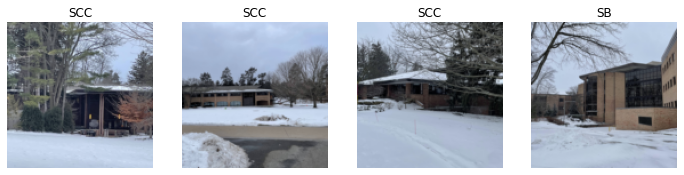

In [7]:
dls1.valid.show_batch(max_n = 4, nrows = 1)

In [8]:
learnBuildings1 = cnn_learner(
    dls=dls1,
    arch=resnet18,
    metrics=error_rate
)
learnBuildings1.fine_tune(epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.226333,0.952570,0.625000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.013371,0.587644,0.250000,00:02
1,0.712289,0.493454,0.250000,00:02
2,0.820473,0.109684,0.000000,00:02
3,0.923931,0.068789,0.000000,00:02


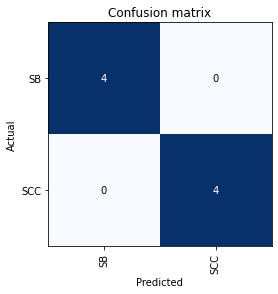

In [9]:
interp1 = ClassificationInterpretation.from_learner(learnBuildings1)
interp1.plot_confusion_matrix()

Though there is not a ton of data, the model correctly classified its test data. All 4 science building images are predicted as such, and likewise for the spoelhof buildings. The error rate range was 0%-62.5%, and this metric improved with each epoch.

## Model 2: 50% Validation

In [10]:
buildings2 = DataBlock(
    #1st is input, 2nd is output or response
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=340),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
dls2 = buildings2.dataloaders(path, bs = 4)

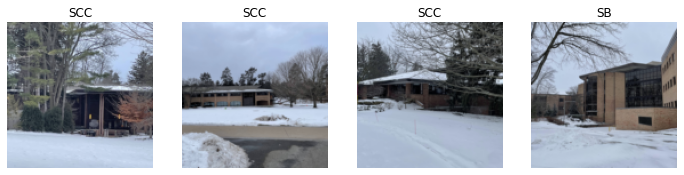

In [12]:
dls2.valid.show_batch(max_n = 4, nrows = 1)

In [13]:
learnBuildings2 = cnn_learner(
    dls=dls2,
    arch=resnet18,
    metrics=error_rate
)
learnBuildings2.fine_tune(epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.564508,0.990985,0.350000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.914592,0.782506,0.400000,00:02
1,0.894728,0.391982,0.250000,00:02
2,0.690979,0.224330,0.150000,00:02
3,0.513379,0.144213,0.050000,00:02


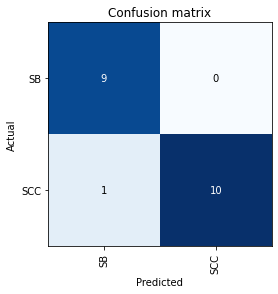

In [14]:
interp2 = ClassificationInterpretation.from_learner(learnBuildings2)
interp2.plot_confusion_matrix()

Using a larger validation split % allowed for more data to be tested (and less to be trained). Even with less input data, the learner was able to correctly predict almost every image correctly, only predicting one spoelhof center image as the science building. The range of error rates was between 5%-40%. 

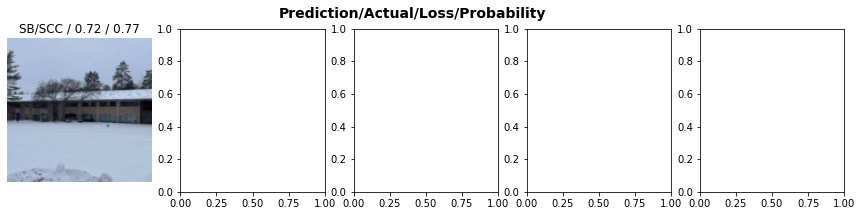

In [24]:
interp2.plot_top_losses(5, nrows=1)

This was the only incorrect classification - and I think I took a few pictures that had this sort of layout, so it's interesting this one was predicted wrong of all of the images. 

## Model 3: 50% Validation with augmentation

In [15]:
buildings3 = DataBlock(
    #1st is input, 2nd is output or response
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=340),
    get_y=parent_label,
    item_tfms=Resize(128)
)

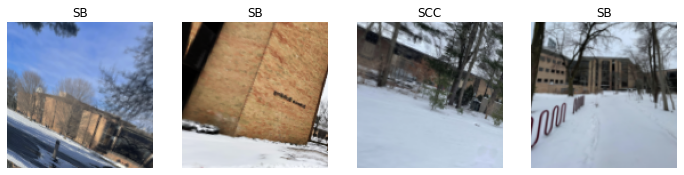

In [20]:
buildings3 = buildings3.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls3 = buildings3.dataloaders(path, bs = 4)
dls3.train.show_batch(max_n = 4, nrows = 1)

In [21]:
learnBuildings3 = cnn_learner(
    dls=dls3,
    arch=resnet18,
    metrics=error_rate
)
learnBuildings3.fine_tune(epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.144939,0.663241,0.300000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.814737,0.589067,0.350000,00:02
1,1.041613,0.415689,0.250000,00:02
2,0.995515,0.340503,0.150000,00:02
3,0.948818,0.345433,0.150000,00:02


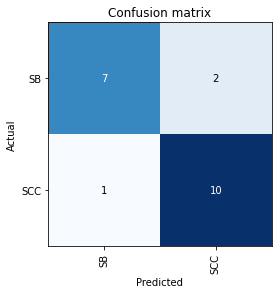

In [22]:
interp3 = ClassificationInterpretation.from_learner(learnBuildings3)
interp3.plot_confusion_matrix()

In the augmentation model, error rate minimums are the highest out of the three models (15% inaccuracy compared to 0 and 5). It mistakenly identifies two science building pictures as being the spoelhof center - though it is still relatively accurate in its predictions. Of course, because of the augmentation, the model becomes prone to more errors. 

Note: I know the submission said not to show results of every model trained, but I didn't know how else to show the work I did with the conclusions I made about each model's outputs. 

## General Reflection Questions

Q1: Overall, each classifier was quite accurate - error rates are listed above for each model's results. 

Q2: There were minimal mistakes in both the 50% partitioned data and the augmented data. The augmented data threw some misclassified images due to their distortion. I also discussed in the Model 2 section that I found it interesting that one particular image was classified incorrectly. 

Q3: I used different cross-validation percentages for this reason. It worked with a larger training pool and still did pretty well with slightly smaller training pool. With an even smaller training set, one would think the classifier becomes more inaccurate. 

Q4: One thing I had to decide was what I needed to set the batch size as - it failed with 64 since there are only 41 images, so I opted to go with a batch size of 4. In data collection, I felt that I needed to try and get a few pictures from different angles and sides of the buildings, and I took some photos in small bursts, moving the camera slightly. I feel like I did okay at collecting the data and taking the pictures given that I have mediocre photography skills. It would have been nice to take some photos at different times of the day - one flaw potentially with the dataset is that for each building, I only took photos on two different days. It would have been interesting to have variations in lighting, shadow, time of day, weather, etc. I think the dataset would be a little bit more versatile with this added - it would probably be more trained on the building itself rather than the building AND the hue of the sky.